In this (relaxed) tutorial, the goal is to explore the difference between K-Means and GMM on different data sets, which are more or less separable.  

For this, the data is generated artificially.  We'll assume each cluster is generated by a Normal (Gaussian) law. 

These data points live in two dimensions, so as to ease graphical representation

# Data generation and clustering

In [1]:
# imports
import numpy as np
%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import random
np.random.seed(3) # for reproducibility

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

## "gaussian" generation

We'll use *np.random.multivariate_normal()*
- Read the docs !!
- We'll generate two batches of points (each batch stands for 1 class) :
    - 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
    - 500 points drawn from a gaussian of average (0,0) and diagonal variance (1,1). 
- Generate the points, then represent them in two ways:
    - with a single color
    - with a different color for each cluster 

In [2]:
mean1 = [4,4]
cov1 = [[2,0],[0,2]]
dist1 = np.random.multivariate_normal(mean1, cov1, 1500)

mean2 = [0,0]
cov2 = [[1,0],[0,1]]
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

dist = np.concatenate((dist1,dist2))

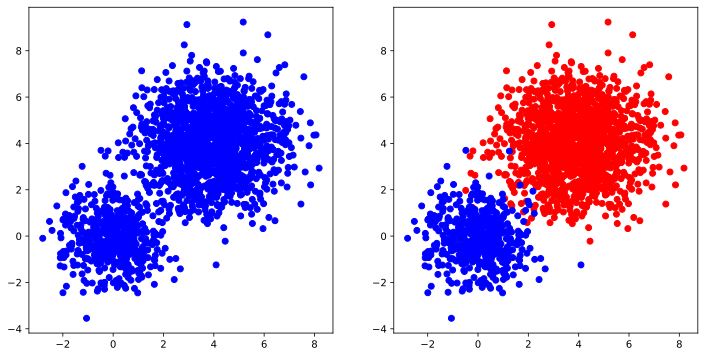

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(dist[:,0], dist[:,1], 'bo')
ax2.plot(dist1[:,0], dist1[:,1], 'ro', dist2[:,0], dist2[:,1], 'bo')

Can you predict what the Kmeans clustering will produce ?

## Clustering 

- Cluster the data using $K=2$
- Draw the results
- Compute the  *"error"* of the clustering, *by hand* (not using scikit-learn's routines)
- Do the same with a GMM, still with $K=2$, compare graphically and quantitatively the results.
- Represent the data so that:
    - in blue, point classified the same way by K-means and GMMs.
    - in red, points that are classified differently
What do you notice ?

In [22]:
labels_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

labels_gmm = GaussianMixture(n_components=2, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

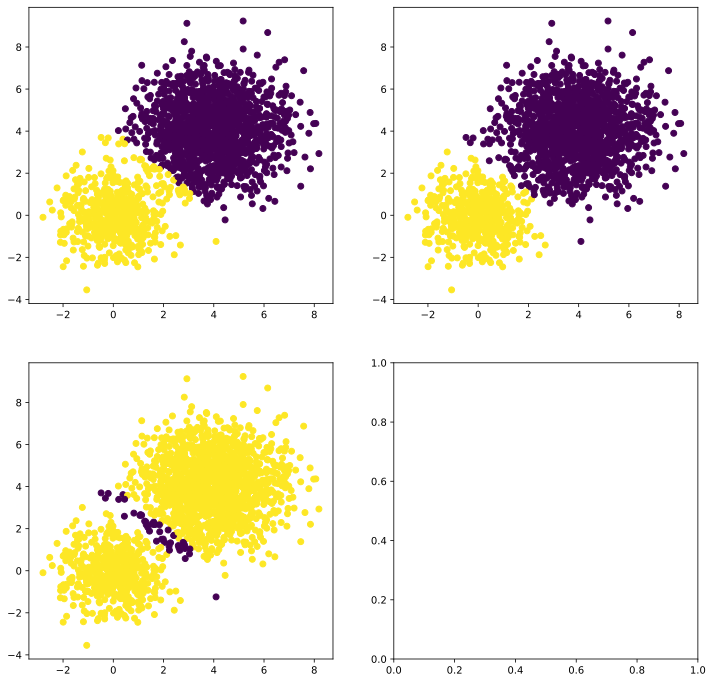

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes[0][0].scatter(dist[:,0], dist[:,1], c=labels_kmeans)
axes[0][1].scatter(dist[:,0], dist[:,1], c=labels_gmm)
axes[1][0].scatter(dist[:,0], dist[:,1], c=labels_gmm==labels_kmeans)

# A bit harder 

to make the tash more difficult (for the algorithm, not you), we're going to change genreating parameters:
- 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
- 500 points drawn from a gaussian of average (0,**4**) and diagonal variance (1,1). 

With these new data : 
- Re-do the previous question, compare results
- If we increase the cluster number to 3 and then to 4, what do we notice, when using GMMs ?

Repeat these experiments with the following generating parameters:
- 1500 points drawn from a gaussian of average (4,4) and diagonal variance (2,2). 
- 500 points drawn from a gaussian of average (0,4) and diagonal variance (**4,0.1**).


In [26]:
mean1 = [4,4]
cov1 = [[2,0],[0,2]]
dist1 = np.random.multivariate_normal(mean1, cov1, 1500)

mean2 = [0,4]
cov2 = [[1,0],[0,1]]
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

dist = np.concatenate((dist1,dist2))

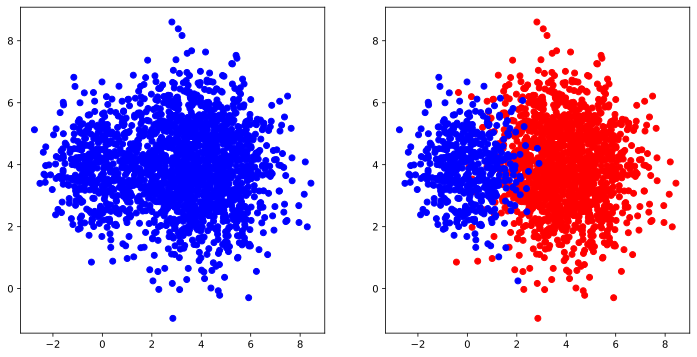

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(dist[:,0], dist[:,1], 'bo')
ax2.plot(dist1[:,0], dist1[:,1], 'ro', dist2[:,0], dist2[:,1], 'bo')

In [37]:
labels_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

labels_gmm = GaussianMixture(n_components=2, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

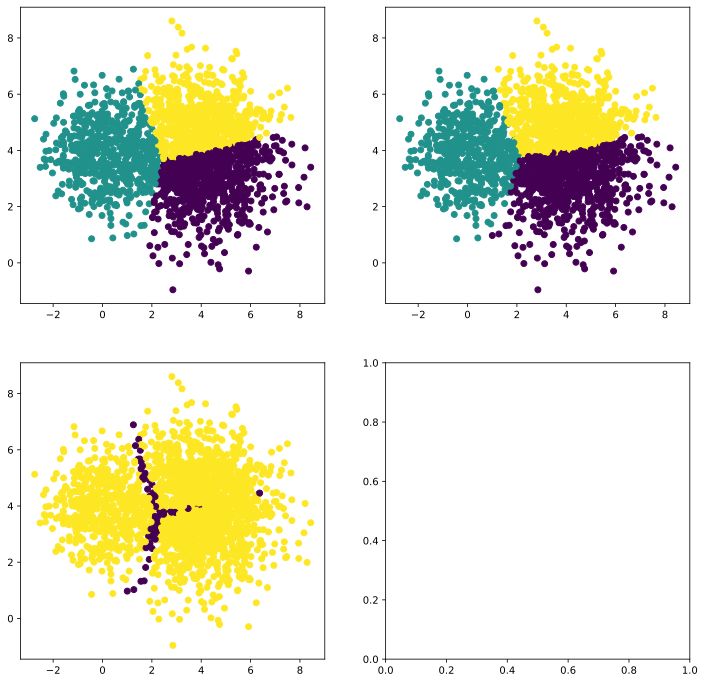

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes[0][0].scatter(dist[:,0], dist[:,1], c=labels_kmeans)
axes[0][1].scatter(dist[:,0], dist[:,1], c=labels_gmm)
axes[1][0].scatter(dist[:,0], dist[:,1], c=labels_gmm==labels_kmeans)

In [43]:
labels_kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

labels_gmm = GaussianMixture(n_components=3, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

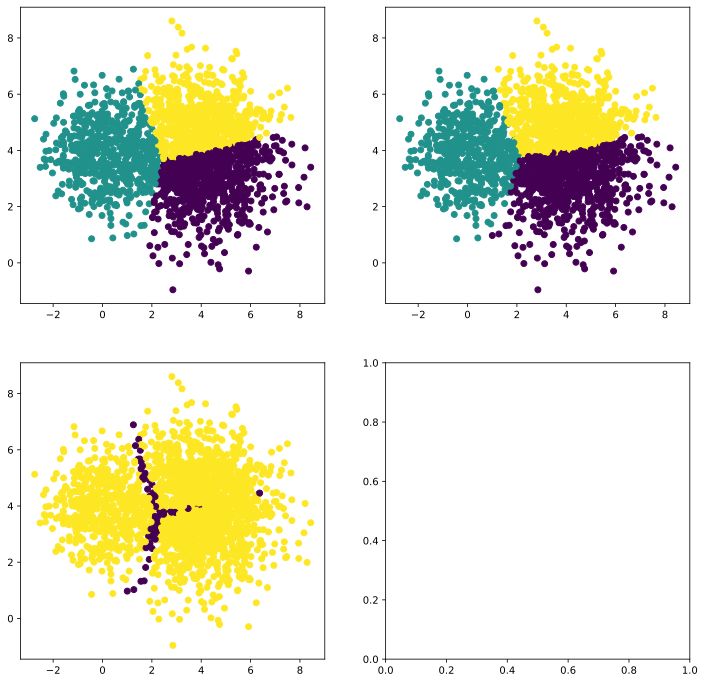

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes[0][0].scatter(dist[:,0], dist[:,1], c=labels_kmeans)
axes[0][1].scatter(dist[:,0], dist[:,1], c=labels_gmm)
axes[1][0].scatter(dist[:,0], dist[:,1], c=labels_gmm==labels_kmeans)

In [45]:
labels_kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

labels_gmm = GaussianMixture(n_components=4, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

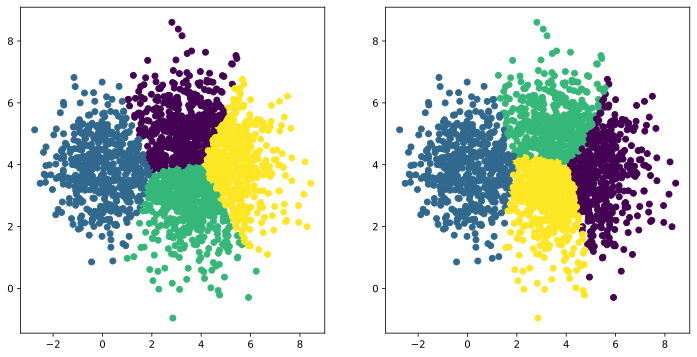

In [46]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.scatter(dist[:,0], dist[:,1], c=labels_kmeans)
ax2.scatter(dist[:,0], dist[:,1], c=labels_gmm)

In [48]:
mean1 = [4,4]
cov1 = [[2,0],[0,2]]
dist1 = np.random.multivariate_normal(mean1, cov1, 1500)

mean2 = [0,4]
cov2 = [[4,0],[0,0.1]]
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

dist = np.concatenate((dist1,dist2))

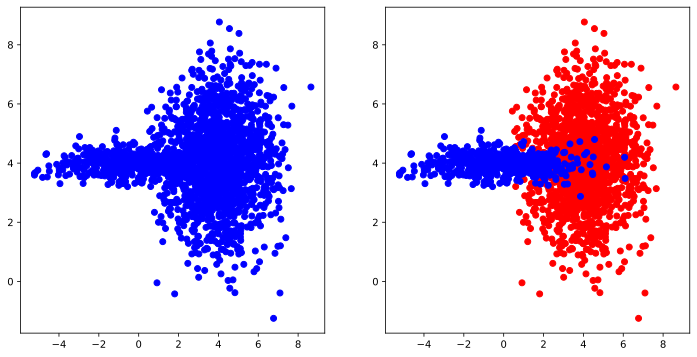

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(dist[:,0], dist[:,1], 'bo')
ax2.plot(dist1[:,0], dist1[:,1], 'ro', dist2[:,0], dist2[:,1], 'bo')

In [50]:
labels_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

labels_gmm = GaussianMixture(n_components=2, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

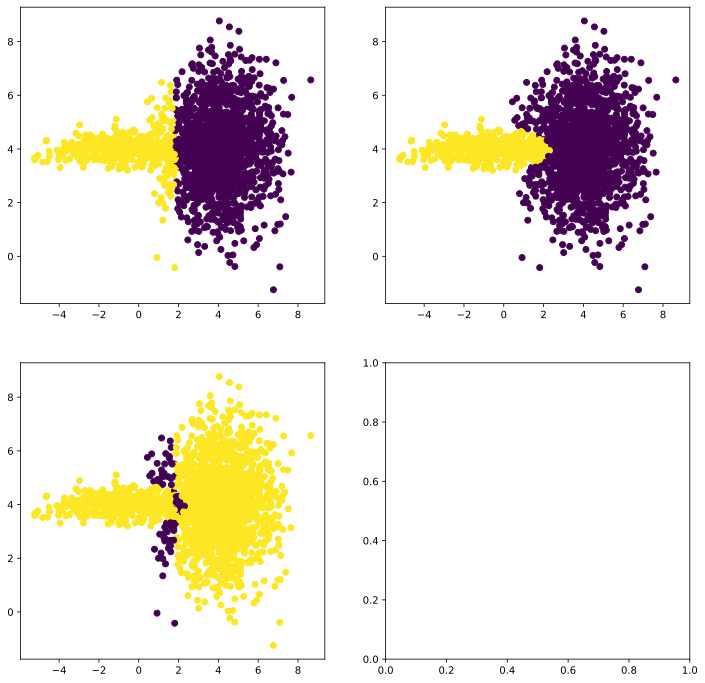

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes[0][0].scatter(dist[:,0], dist[:,1], c=labels_kmeans)
axes[0][1].scatter(dist[:,0], dist[:,1], c=labels_gmm)
axes[1][0].scatter(dist[:,0], dist[:,1], c=labels_gmm==labels_kmeans)

In [52]:
labels_kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

labels_gmm = GaussianMixture(n_components=3, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

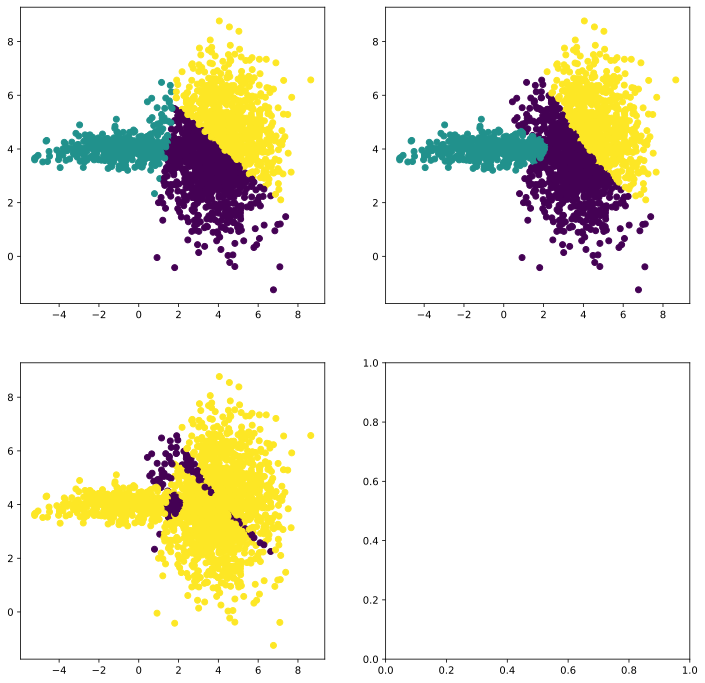

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(12,12))
axes[0][0].scatter(dist[:,0], dist[:,1], c=labels_kmeans)
axes[0][1].scatter(dist[:,0], dist[:,1], c=labels_gmm)
axes[1][0].scatter(dist[:,0], dist[:,1], c=labels_gmm==labels_kmeans)

In [45]:
labels_kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

labels_gmm = GaussianMixture(n_components=4, random_state=0).fit_predict(np.concatenate((dist1,dist2)))

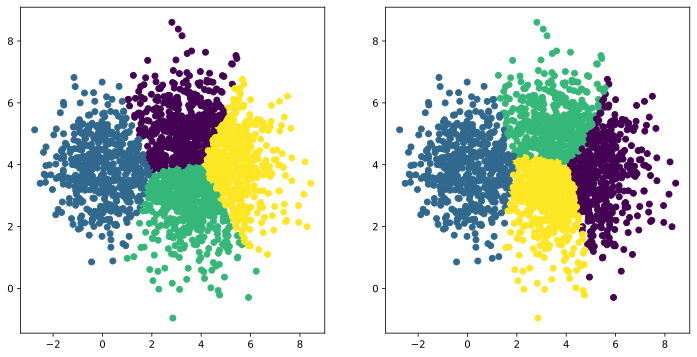

In [46]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.scatter(dist[:,0], dist[:,1], c=labels_kmeans)
ax2.scatter(dist[:,0], dist[:,1], c=labels_gmm)

What is the main criticism you should make on this tutorial ? (think of the methods compared and the synthetic data generation) ?

1) GMM spherical and K-means are pretty much same.